# LOAD DATASET

In [6]:
import pandas as pd

# Load dataset
file_path = "C:\\Users\\AMAN MUJEEB\\Downloads\\Employee.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Display basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


# DATA EXPLORATION

In [10]:
# Display unique values count for each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Perform statistical analysis
print(df.describe(include='all'))
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


company: 6 unique values
age: 29 unique values
salary: 40 unique values
place: 11 unique values
country: 1 unique values
gender: 2 unique values
       company         age       salary   place country      gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


# DATA CLEANING

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\Employee.csv")

# Replace Age = 0 with NaN
df.loc[df['Age'] == 0, 'Age'] = None

# Remove duplicate rows
df = df.drop_duplicates()

# Handle missing values properly:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

# Check if everything is fine
print(df.isnull().sum())  # Should return 0 if missing values are handled
print(df.info())  # Check structure of dataframe


Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB
None


# DATA ANALYSIS

In [15]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_df)


     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


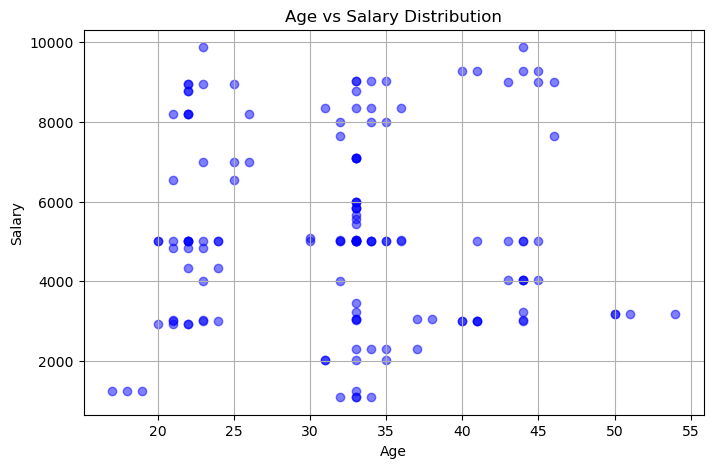

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Salary'], color='blue', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Distribution")
plt.grid(True)
plt.show()


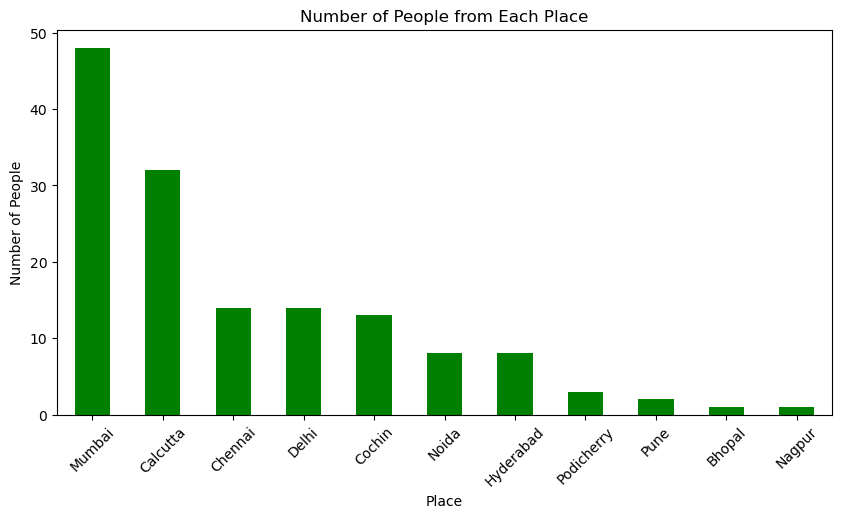

In [17]:
place_counts = df['Place'].value_counts()

plt.figure(figsize=(10,5))
place_counts.plot(kind='bar', color='green')
plt.xlabel("Place")
plt.ylabel("Number of People")
plt.title("Number of People from Each Place")
plt.xticks(rotation=45)
plt.show()


# DATA ENCODING

In [18]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Initialize LabelEncoder
label_enc = LabelEncoder()

# Apply Label Encoding to categorical columns (Company and Place)
df_encoded['Company'] = label_enc.fit_transform(df_encoded['Company'])
df_encoded['Place'] = label_enc.fit_transform(df_encoded['Place'])

# Apply One-Hot Encoding to categorical columns (Company and Place)
df_encoded = pd.get_dummies(df_encoded, columns=['Company', 'Place'], drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


    Age  Salary Country  Gender  Company_1  Company_2  Company_3  Company_4  \
0  20.0  5000.0   India       0      False      False      False       True   
1  30.0  5000.0   India       0      False       True      False      False   
2  35.0  2300.0   India       0      False      False      False       True   
3  40.0  3000.0   India       0      False       True      False      False   
4  23.0  4000.0   India       0      False      False      False       True   

   Company_5  Place_1  Place_2  Place_3  Place_4  Place_5  Place_6  Place_7  \
0      False    False     True    False    False    False    False    False   
1      False    False    False    False    False    False     True    False   
2      False     True    False    False    False    False    False    False   
3      False    False    False    False     True    False    False    False   
4      False    False    False    False    False    False     True    False   

   Place_8  Place_9  Place_10  
0    False    Fals

# FEATURE SCALING

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Creating a copy to avoid modifying the original encoded dataframe
df_scaled = df_encoded.copy()

# Initialize Scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = ['Age', 'Salary']  # Add other numerical features if available

# Apply StandardScaler
df_scaled[numerical_cols] = standard_scaler.fit_transform(df_scaled[numerical_cols])

# Apply MinMaxScaler
df_scaled[numerical_cols] = minmax_scaler.fit_transform(df_scaled[numerical_cols])

# Display the first few rows of the scaled dataset
print(df_scaled.head())


        Age    Salary Country  Gender  Company_1  Company_2  Company_3  \
0  0.081081  0.445089   India       0      False      False      False   
1  0.351351  0.445089   India       0      False       True      False   
2  0.486486  0.137817   India       0      False      False      False   
3  0.621622  0.217480   India       0      False       True      False   
4  0.162162  0.331285   India       0      False      False      False   

   Company_4  Company_5  Place_1  Place_2  Place_3  Place_4  Place_5  Place_6  \
0       True      False    False     True    False    False    False    False   
1      False      False    False    False    False    False    False     True   
2       True      False     True    False    False    False    False    False   
3      False      False    False    False    False     True    False    False   
4       True      False    False    False    False    False    False     True   

   Place_7  Place_8  Place_9  Place_10  
0    False    False    Fals